In [1]:
from mpasanalysis import *
from e3sm_simulations import *

In [11]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
ts_yr0 = 26
ts_yr1 = 55
plt_yr0 = 26
plt_yr1 = 55
rest_yr = 51
nmon = 12 # 12 for production and 1 for testing
run = E3SMSimulation(database='e3sm_simulations.xml', runname='low-res-cmp')
data_root = run.get_path(comp='ocn', climo_yr0=ts_yr0, climo_yr1=ts_yr1,
                         ts_yr0=ts_yr0, ts_yr1=ts_yr1, rest_yr=rest_yr)
rst_root = data_root['rst_root']
mon_root = data_root['mon_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.{:04d}-01-01_00000.nc'.format(rest_yr)

# load mesh
mpasmesh = MPASMesh(filepath=rst_file)

# transect
trnsct = VerticalTransect('Hudson Strait')
path0 = mpasmesh.get_shortest_path(trnsct.lon0, trnsct.lat0, trnsct.lon1, trnsct.lat1, npoint_ref=2)

nv = len(path0.idx_vertex)
transport = np.zeros([plt_yr1-plt_yr0+1, nmon, nv])
for i, y in enumerate(np.arange(plt_yr1-plt_yr0+1)+plt_yr0):
    for j, m in enumerate(np.arange(nmon)+1):
        print('{:04d}-{:02d}'.format(y, m))
        mon_file = mon_root+'/mpaso.hist.am.timeSeriesStatsMonthly.{:04d}-{:02d}-01.nc'.format(y, m)
        print(mon_file)
        mpasdata = MPASOData(filepath=mon_file, filepath_mesh=rst_file)
        transport0, dist0 = mpasdata.get_transport_cumulative(path=path0, varname_prefix='timeMonthly_avg_',
                                                              bolus=True)
        transport[i,j,:] = transport0[0]
# dist = dist0
dist = gc_distance(np.array(path0.lon_vertex), np.array(path0.lat_vertex), trnsct.lon0, trnsct.lat0)

# save data
path_transport = fig_root+'/data_transport_LabSea_Hudson-Strait_volume.npz'
np.savez(path_transport, transport=transport, distance=dist)

Pre-defined transect 'Hudson Strait'.
Vertex closest to P0: 295.16686 60.31463
Vertex closest to P1: 293.86939 62.00006
 - Vertex closest to RefP1: 294.62793 61.02786
 - Vertex closest to RefP2: 294.44917 61.57737
0026-01
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0026-01-01.nc
0026-02
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0026-02-01.nc
0026-03
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0026-03-01.nc
0026-04
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0026-04-01.nc
0026-05
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0026-

0030-04
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-04-01.nc
0030-05
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-05-01.nc
0030-06
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-06-01.nc
0030-07
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-07-01.nc
0030-08
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-08-01.nc
0030-09
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0030-09-01.nc
0030-10
/lcrc/group/acme/jwolfe/archive/201905

0034-08
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0034-08-01.nc
0034-09
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0034-09-01.nc
0034-10
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0034-10-01.nc
0034-11
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0034-11-01.nc
0034-12
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0034-12-01.nc
0035-01
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0035-01-01.nc
0035-02
/lcrc/group/acme/jwolfe/archive/201905

0038-12
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0038-12-01.nc
0039-01
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0039-01-01.nc
0039-02
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0039-02-01.nc
0039-03
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0039-03-01.nc
0039-04
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0039-04-01.nc
0039-05
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0039-05-01.nc
0039-06
/lcrc/group/acme/jwolfe/archive/201905

0043-04
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0043-04-01.nc
0043-05
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0043-05-01.nc
0043-06
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0043-06-01.nc
0043-07
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0043-07-01.nc
0043-08
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0043-08-01.nc
0043-09
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0043-09-01.nc
0043-10
/lcrc/group/acme/jwolfe/archive/201905

0047-08
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0047-08-01.nc
0047-09
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0047-09-01.nc
0047-10
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0047-10-01.nc
0047-11
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0047-11-01.nc
0047-12
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0047-12-01.nc
0048-01
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0048-01-01.nc
0048-02
/lcrc/group/acme/jwolfe/archive/201905

0051-12
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0051-12-01.nc
0052-01
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0052-01-01.nc
0052-02
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0052-02-01.nc
0052-03
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0052-03-01.nc
0052-04
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0052-04-01.nc
0052-05
/lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/ocn/hist/mpaso.hist.am.timeSeriesStatsMonthly.0052-05-01.nc
0052-06
/lcrc/group/acme/jwolfe/archive/201905

In [12]:
transport.shape

(30, 12, 9)

In [13]:
transport_mean = np.mean(transport, axis=0)

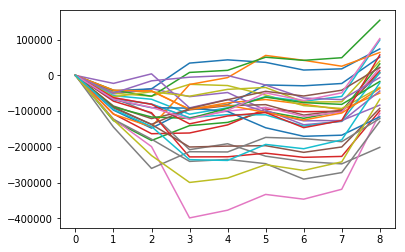

In [14]:
for j in np.arange(30):
    for i in np.arange(1):
        plt.plot(transport[j,i,:])